<a href="https://colab.research.google.com/github/karolinawegrzyn/psi2/blob/main/Z10_E_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

# Random Forests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"]).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

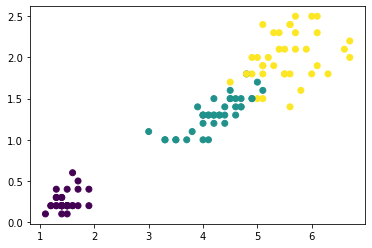

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

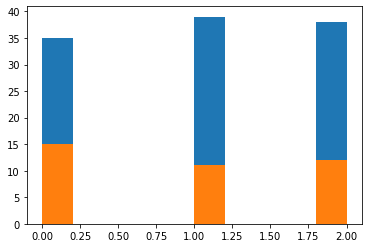

In [5]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

* RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc2 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
rfc3 = RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

for clf in (rfc1,rfc2,rfc3):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 1.0
RandomForestClassifier 1.0
RandomForestClassifier 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


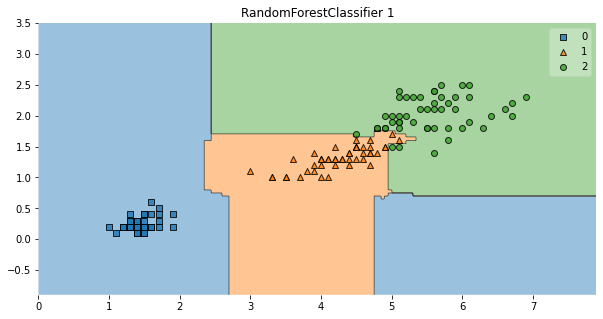

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


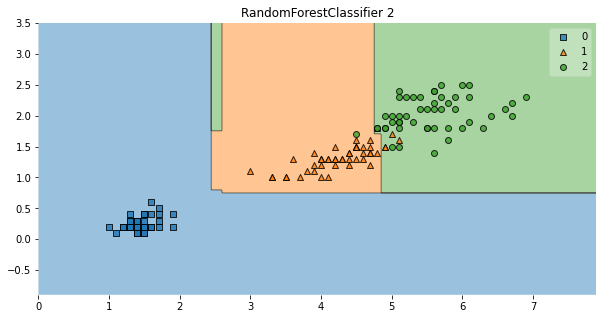

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


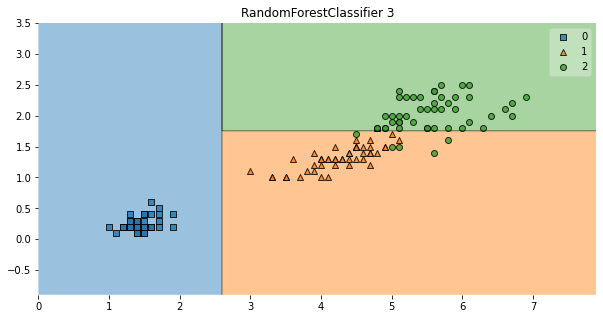

In [12]:
from mlxtend.plotting import plot_decision_regions

rfcs = [rfc1, rfc2, rfc3]
rfc_names = ['RandomForestClassifier 1', 'RandomForestClassifier 2', 'RandomForestClassifier 3']

for i in range (len(rfcs)):
  plt.figure(figsize=(10,5))
  plot_decision_regions(X, y, rfcs[i])
  plt.title(rfc_names[i])
  plt.show()

